We'll start with some magic that will make torch play nice with R on Talapas

In [1]:
Sys.setenv(TORCH_HOME='/gpfs/projects/datascience/shared/R/torch/lantern/build/libtorch')
libdir='/gpfs/projects/datascience/shared/R/Data4ML'
.libPaths(libdir)
Sys.setenv(R_LIBS = paste(libdir, Sys.getenv("R_LIBS"), sep=.Platform$path.sep))

#  Unsupervised Deep Learning for Single Cell Data

All the principles around unsupervised learning apply when you use deep unsupervised techniques. Implementing these models from scratch can be pretty involved, but there are packages available to use some of the algorithms.

1. We'll run the demo of scCAN, an auto-encoder-based tool 
2. We'll combine this method alongside seurat to use its standard tools


# Libraries
We'll use UMAP from the uwot package, scCAN, and Seurat

In [2]:
library('ggplot2')
library('uwot')
library("scCAN")
data("SCE")
library("Seurat")

Loading required package: Matrix

Loading required package: scDHA

Loading required package: FNN

Loading required package: purrr

Attaching SeuratObject

Attaching sp



In [3]:
data <- t(SCE$data); 
head(data)

max(data)
min(data)
mean(data)

Cell1,41,57,45,12,0,0,6,6,1,129,⋯,34,15,1169,44,194,5,1,2047,33,0
Cell2,73,55,45,3,8,0,30,33,0,176,⋯,57,4,1519,57,220,21,0,3017,66,20
Cell3,46,62,40,3,11,0,5,21,0,106,⋯,25,4,936,52,166,27,2,2200,83,13
Cell4,37,39,13,0,16,0,5,0,0,61,⋯,30,1,580,28,55,7,3,1504,32,23
Cell5,77,76,72,0,18,0,10,39,4,140,⋯,64,0,1961,37,168,11,0,2805,84,18
Cell6,23,34,16,0,0,0,5,21,0,62,⋯,15,6,519,26,48,1,0,1047,24,5


[1] 12071

[1] 0

[1] 94.19729

# Normalization

As a reminder, these algorithms determine what's important based on distance quantities. If you're not careful, single-cell data will be dominated by the genes with the largest counts. To help deal with this, its common to log normalize your data and scale it. 

* Another important note 
 Remember it is standard for ML data is Rows = Examples (in this case cells) and Columns are features in this case counts
 
Single cell data is often comes with the columns switched with respect to the ML standard Rows = Counts and Cells = Columns, you'll see **t()** which transposes the matrix
 

In [4]:

# Get data matrix and label
data <- t(SCE$data); 
label <- as.character(SCE$cell_type1)
log_data<-log(data+1)




## Auto-encoder training and clustering in scCAN is a one-liner but it will take a little while to run; here, the more cores, the better.

In [5]:
#Generate clustering result. The input matrix has rows as samples and columns as genes
result <- scCAN(log_data,ncores=8)


The optimal number of cluster is: 5



In [6]:
View(result)

0.079295777,-0.08661066,0.14981142,0.29089642,-0.22472209,0.0956197456,-0.24760087,-0.067648128,-0.1666410416,0.0333917588,0.376015902,-0.331120014,0.01148983,-0.215430930,0.0192259587
-0.042261496,-0.17132783,0.03985155,0.23730342,-0.02530099,-0.0450533330,-0.41525453,0.021368369,0.1746590137,0.1741464138,0.051449552,0.010907804,-0.01100960,0.118321463,0.0833063945
-0.130345613,-0.08113651,0.45136914,0.22782765,-0.15557760,-0.0470343232,-0.20273755,-0.067493871,-0.0645610169,0.2212060690,0.064238802,-0.116730019,-0.23629628,-0.243122414,-0.0402013287
-0.183285326,-0.30765215,0.20935813,0.14402227,-0.32995284,0.0732038170,-0.18587978,0.003975281,-0.1642831266,0.2779641449,-0.023038678,-0.245165378,-0.17911549,-0.054111250,0.0467733964
-0.019642789,-0.17254287,0.24513131,0.13298294,-0.09316771,-0.4997718334,-0.16663499,-0.062295232,-0.0111782914,0.0393273905,0.096628100,-0.197276190,0.01032379,0.005854317,0.1206030473
-0.239643574,-0.16280307,0.23303822,0.18300408,-0.23298870,0.0038019009,-0.20381649,-0.086427532,-0.2573981285,0.3381369114,-0.189019397,-0.307383209,-0.09131142,-0.288330495,0.0662888885
-0.064524651,-0.29568145,0.15616299,0.21591282,-0.20620155,-0.0788212866,-0.28066814,0.016277788,-0.5830835700,0.1517114788,0.028340351,-0.261377752,-0.10218135,-0.512135804,-0.2173599750
-0.108297341,-0.14124984,0.45691109,0.28638679,-0.12812920,0.1192366853,-0.32067984,-0.174168915,-0.0246967971,0.0788186640,0.153653666,-0.127818912,-0.15253630,-0.235808119,0.0006709397
-0.092280656,-0.34460351,0.06008031,0.21557295,-0.32053614,-0.0355794430,-0.04579189,0.161847472,-0.0613199994,0.2541289628,-0.019142170,-0.113462418,-0.15086463,-0.093581848,0.0084620565
0.140912890,-0.03667862,0.27591109,0.24191453,-0.07245757,-0.2110964060,-0.22798495,-0.162762552,0.0001925016,0.1303136796,-0.097313225,-0.003112026,-0.01264328,-0.152097151,-0.0181810874
-0.024065733,-0.19703507,0.31087357,0.14101775,-0.09584801,-0.0139435790,-0.19961059,-0.030532330,0.2010818720,0.1619561315,0.029246686,-0.119270578,-0.12138472,0.254188657,0.0585118979


Like PCA this returns a reduced dimension latent space, by default 15 dimensions. We'll still need to use something like umap to plot this data.


0.07929578,-0.08661066,0.14981142,0.2908964,-0.22472209,0.095619746,-0.2476009,-0.067648128,-0.16664104,0.03339176,0.37601590,-0.3311200,0.01148983,-0.215430930,0.01922596
-0.04226150,-0.17132783,0.03985155,0.2373034,-0.02530099,-0.045053333,-0.4152545,0.021368369,0.17465901,0.17414641,0.05144955,0.0109078,-0.01100960,0.118321463,0.08330639
-0.13034561,-0.08113651,0.45136914,0.2278277,-0.15557760,-0.047034323,-0.2027376,-0.067493871,-0.06456102,0.22120607,0.06423880,-0.1167300,-0.23629628,-0.243122414,-0.04020133
-0.18328533,-0.30765215,0.20935813,0.1440223,-0.32995284,0.073203817,-0.1858798,0.003975281,-0.16428313,0.27796414,-0.02303868,-0.2451654,-0.17911549,-0.054111250,0.04677340
-0.01964279,-0.17254287,0.24513131,0.1329829,-0.09316771,-0.499771833,-0.1666350,-0.062295232,-0.01117829,0.03932739,0.09662810,-0.1972762,0.01032379,0.005854317,0.12060305
-0.23964357,-0.16280307,0.23303822,0.1830041,-0.23298870,0.003801901,-0.2038165,-0.086427532,-0.25739813,0.33813691,-0.18901940,-0.3073832,-0.09131142,-0.288330495,0.06628889


[1] 1 4 5 4 3 5

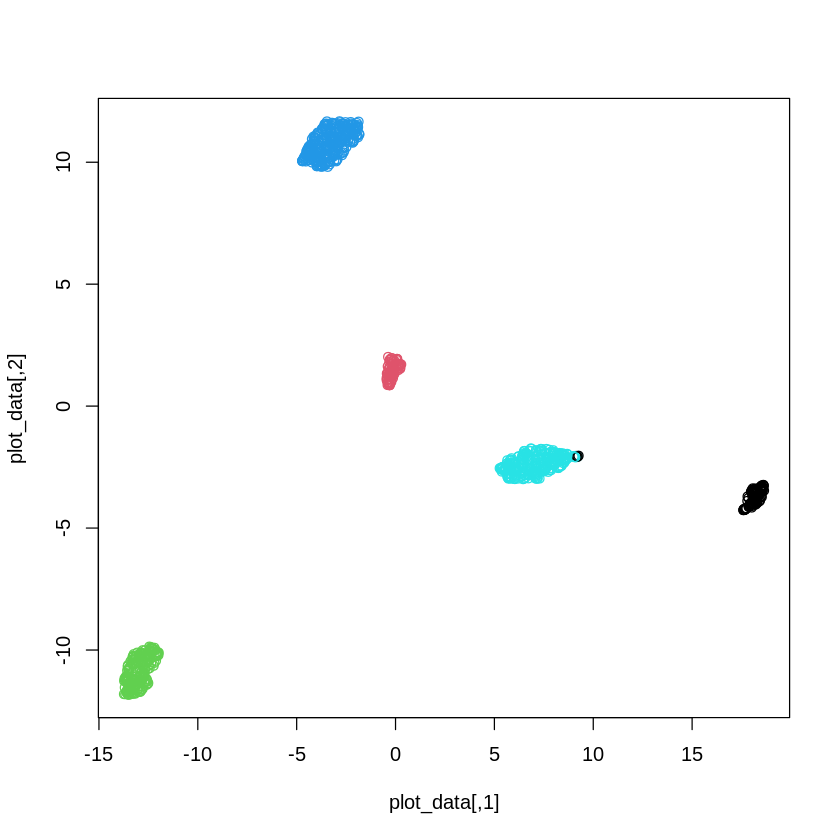

In [7]:
head(result$latent)
head(result$cluster)

plot_data=umap(result$latent)

plot(plot_data,col=result$cluster)


# The above is the example that comes with scCAN let's try a more complicated analysis in Seurat

We'll use the dataset from the Seurat Tutorial and their pipeline

In [8]:
pbmc.data <- Read10X(data.dir = "/projects/datascience/shared/filtered_gene_bc_matrices/hg19/")

pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)
pbmc <- NormalizeData(pbmc)
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
pbmc <- RunUMAP(pbmc, dims = 1:10)

features=VariableFeatures(object=pbmc)


Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Centering and scaling data matrix

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, A

In [9]:
#count_data=t(as.matrix(GetAssayData(object = pbmc, slot = "data")[features,])) 

#Matrix is needed to run this line it's loaded above otherwise use top line
count_data=t(GetAssayData(object = pbmc, slot = "data"))
#[features,]

In [10]:

s_result <- scCAN(count_data,ncores=16,sparse=T)

The optimal number of cluster is: 8



In [11]:
pbmc@meta.data$scan.clusters <- s_result$cluster
Idents(object = pbmc)<- "scan.clusters"
pbmc.markers <- FindAllMarkers(pbmc,min.pct = 0.25, logfc.threshold = 0.25)
head(pbmc.markers)


Calculating cluster 6

Calculating cluster 3

Calculating cluster 4

Calculating cluster 8

Calculating cluster 1

Calculating cluster 5

Calculating cluster 2

Calculating cluster 7



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CCL5,6.277102e-250,3.469273,0.986,0.215,8.608418e-246,6,CCL5
NKG7,1.173776e-178,2.095663,0.908,0.206,1.609716e-174,6,NKG7
GZMK,1.601385e-174,3.060424,0.544,0.047,2.196140e-170,6,GZMK
GZMA,1.593988e-162,1.998694,0.736,0.115,2.185995e-158,6,GZMA
CST7,2.976888e-156,2.005471,0.716,0.117,4.082504e-152,6,CST7
CD8A,1.089993e-131,2.003930,0.501,0.059,1.494816e-127,6,CD8A


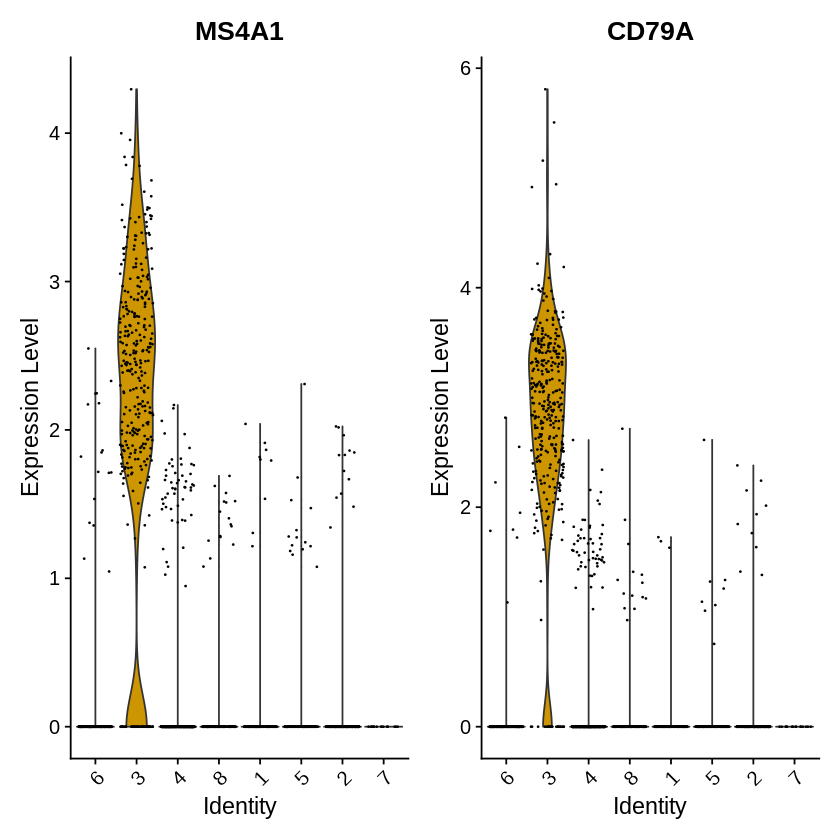

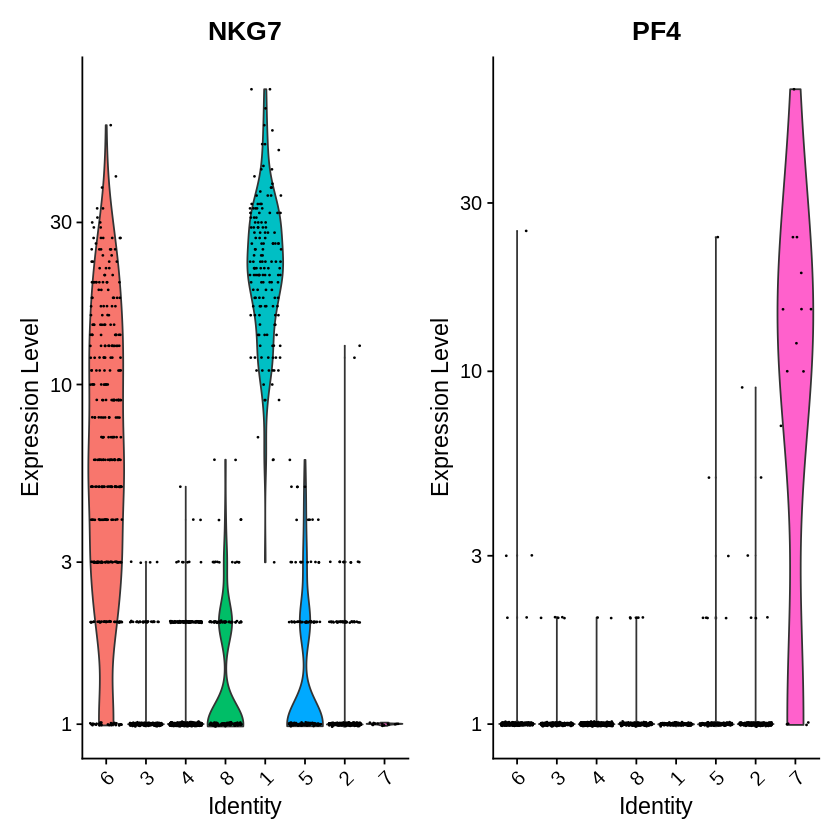

In [12]:
VlnPlot(pbmc, features = c("MS4A1", "CD79A"))
VlnPlot(pbmc, features = c("NKG7", "PF4"), slot = "counts", log = TRUE)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




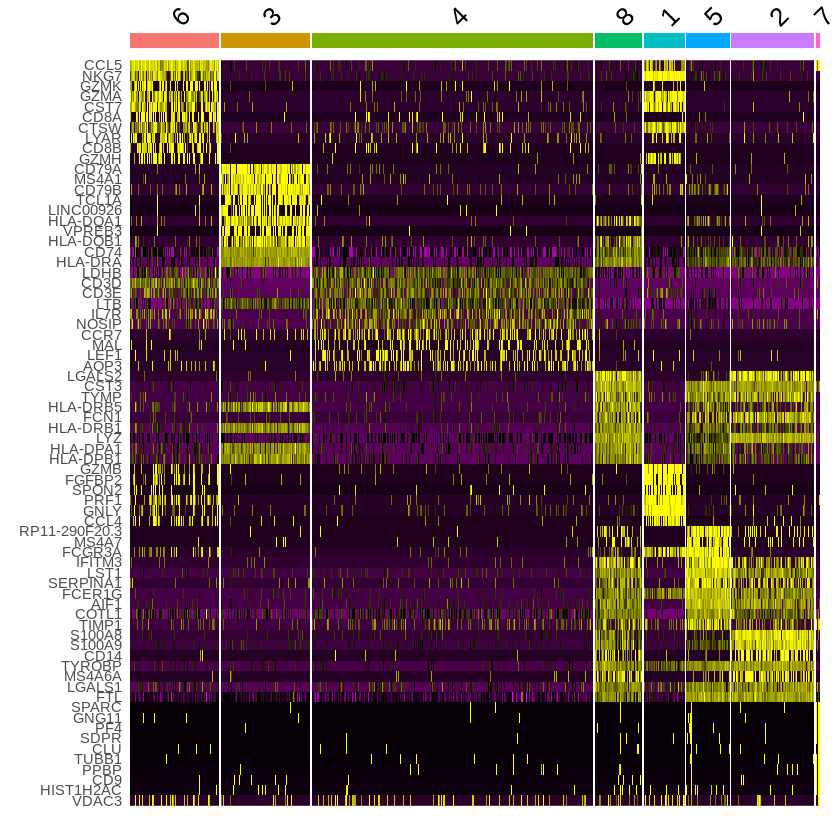

In [13]:
library(dplyr)
pbmc.markers %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = avg_log2FC) -> top10
DoHeatmap(pbmc, features = top10$gene) + NoLegend()

[1] "SCC_1" "SCC_2"

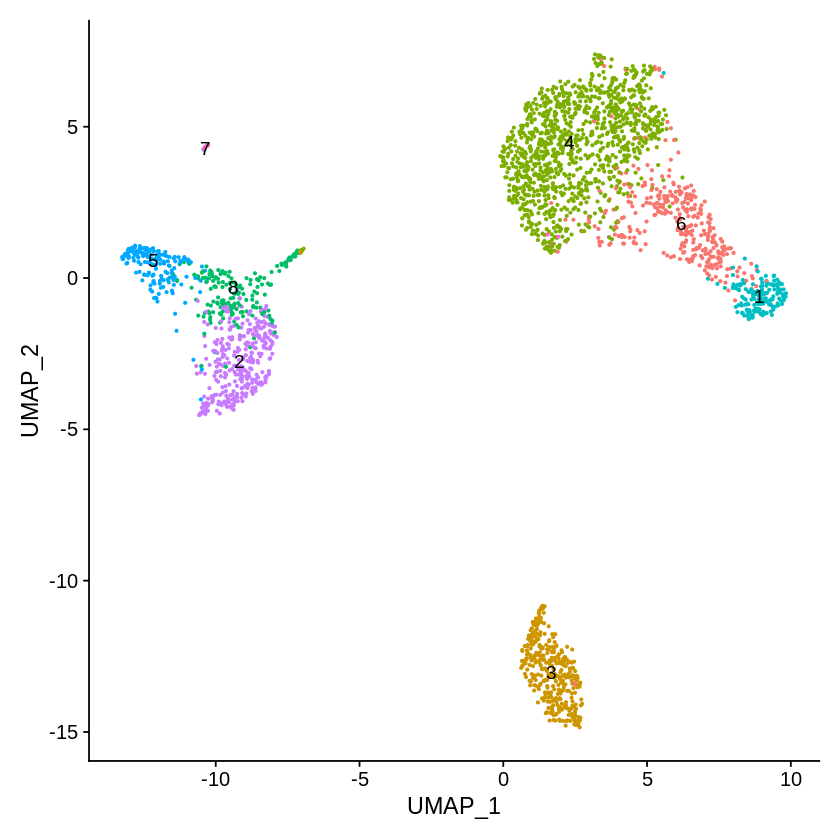

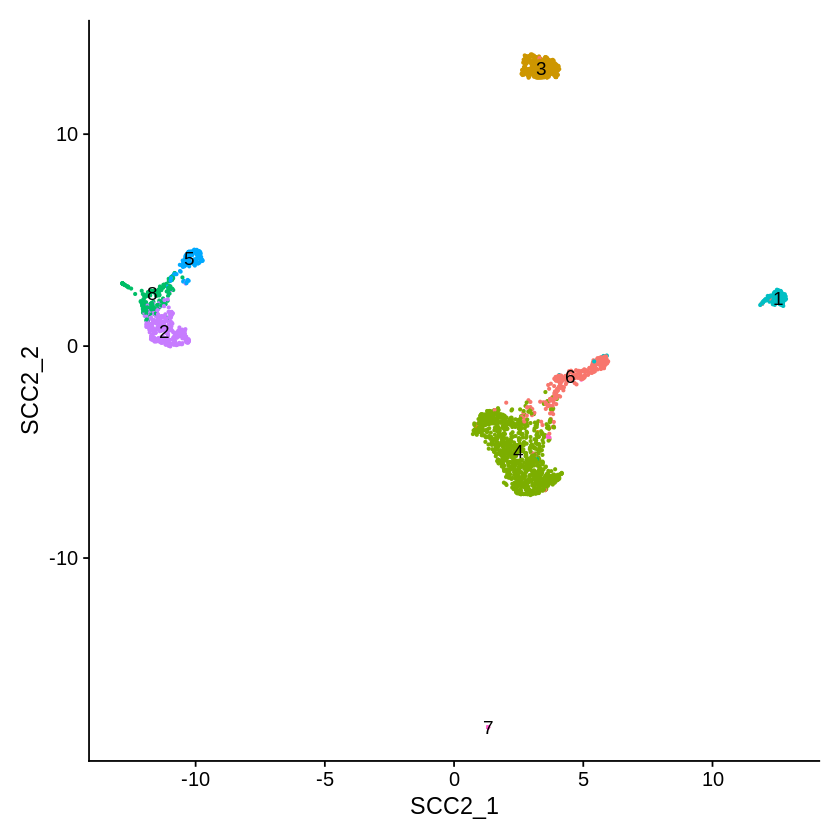

In [14]:

sc_umap=umap(s_result$latent)
colnames(sc_umap) <- paste0("SCC_", 1:2)
row.names(sc_umap) <- row.names(pbmc@reductions$pca)
colnames(sc_umap)
pbmc[['scCANumap']]<-CreateDimReducObject(embeddings = sc_umap , key = "SCC2_", assay = DefaultAssay(pbmc))

DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()
DimPlot(pbmc, reduction = "scCANumap", label = TRUE, pt.size = 0.5 ) + NoLegend()
